# Machine Learning

In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [38]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

## Load data from pre-processing

In [39]:
df_p = pd.read_csv("crowdstorm_players_aggregated.csv", encoding = "utf-8")

# Machine Learning

## Preparation of the data
First let's create a vector *X* of features and samples, and a vector *Y* of the labels corresponding. Y will have the value of *mean_rater*

In [40]:
df_y = df_p['mean_rater']

df_x = df_p.copy()
df_x.drop(['mean_rater'],inplace=True,axis=1,errors='ignore')

df_x.describe()

meanExp      defeats      meanIAT     victories   redReferee  \
count  1418.000000  1418.000000  1418.000000   1418.000000  1418.000000   
mean      0.444205   561.917489     0.347126    820.600141     0.009861   
std       0.101160   573.695929     0.014516   1019.439932     0.015333   
min       0.065271     0.000000     0.287530      0.000000     0.000000   
25%       0.361671   173.000000     0.336628    197.000000     0.000000   
50%       0.402253   384.500000     0.340851    497.000000     0.002115   
75%       0.551277   749.750000     0.361154   1068.750000     0.014864   
max       1.031407  4269.000000     0.396512  10092.000000     0.105786   

            weight  yellowReferee        seIAT       height        seExp  \
count  1418.000000    1418.000000  1418.000000  1418.000000  1418.000000   
mean     76.263047       0.325326     0.000293   182.159379     0.001399   
std       7.105262       0.265622     0.000390     6.799995     0.001957   
min      55.000000       0.000000     0.000010   161.000000     0.000037   
25%      71.000000       0.140651     0.000120   178.000000     0.000547   
50%      76.000000       0.256060     0.000229   182.500000     0.001002   
75%      81.000000       0.447792     0.000306   187.000000     0.001437   
max     100.000000       2.002729     0.009063   203.000000     0.045650   

           ...       Center Forward  Center Midfielder  Defensive Midfielder  \
count      ...          1418.000000        1418.000000           1418.000000   
mean       ...             0.133286           0.041608              0.120592   
std        ...             0.340004           0.199762              0.325768   
min        ...             0.000000           0.000000              0.000000   
25%        ...             0.000000           0.000000              0.000000   
50%        ...             0.000000           0.000000              0.000000   
75%        ...             0.000000           0.000000              0.000000   
max        ...             1.000000           1.000000              1.000000   

        Goalkeeper  Left Fullback  Left Midfielder  Left Winger  \
count  1418.000000    1418.000000      1418.000000  1418.000000   
mean      0.111425       0.082511         0.053597     0.037377   
std       0.314768       0.275238         0.225299     0.189750   
min       0.000000       0.000000         0.000000     0.000000   
25%       0.000000       0.000000         0.000000     0.000000   
50%       0.000000       0.000000         0.000000     0.000000   
75%       0.000000       0.000000         0.000000     0.000000   
max       1.000000       1.000000         1.000000     1.000000   

       Right Fullback  Right Midfielder  Right Winger  
count     1418.000000       1418.000000   1418.000000  
mean         0.075458          0.042313      0.039492  
std          0.264223          0.201374      0.194832  
min          0.000000          0.000000      0.000000  
25%          0.000000          0.000000      0.000000  
50%          0.000000          0.000000      0.000000  
75%          0.000000          0.000000      0.000000  
max          1.000000          1.000000      1.000000  

[8 rows x 31 columns]

### Division of the dataset in train/test datasets
we will use a training set containing 80% of the data, and a testing set containing 20% of the data

when specifying *random_state = 0*, we make sure that the splitting is done everytime at the same place. We can remove this option to have a random splitting.

In [41]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)
df_y_test = np.asarray(df_y_test, dtype="|S6")
df_x_test = np.asarray(df_x_test, dtype="|S6")
df_y_train = np.asarray(df_y_train, dtype="|S6")
df_x_train = np.asarray(df_x_train, dtype="|S6")

df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape

((1134, 31), (1134,), (284, 31), (284,))

## Random Forest
### First try with naive parameters

In [42]:
# TRAIN RANDOM FOREST

# Train model
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100)
rand_forest_model.fit(df_x_train,df_y_train)

# Predict
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)
print("Accuracy score")
print(accuracy_rand_forest)

Accuracy score
0.81338028169


The accuracy on the training set will now be computed. If it is greatly higher than on the test set the model is probably overfitting.

** Ca sert à rien**

The model is overfitting. This is probably due to the depth of the trees being too high. We will train the model again with a smaller max_depth of 10.

** On peut refaire une CV**

The accuracy on the training set is similar. Let's now compute the accuracy on the training set

The accuracy score on the training test is now smaller, the overfitting issue has been reduced

## Cross validation

we will define K = 20 folds.


In [43]:
num_folds = 20

### 1 hyperparameter : number of trees

Choices for the number of estimators hyperparameter:

In [44]:
number_trees = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [45]:
rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for number_trees_idx, number_trees_value in enumerate(number_trees):
    
    print('number_trees_idx: ',number_trees_idx+1,'/',len(number_trees),', value: ', number_trees_value)

    # Random forest
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=number_trees_value, max_depth=10)

    #Scores
    scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
    rf_scores.append(scores.mean())
    rf_param.append(number_trees_value)
    print('Accuracy = ', scores.mean())


number_trees_idx:  1 / 12 , value:  10
Accuracy =  0.761243086164
number_trees_idx:  2 / 12 , value:  50
Accuracy =  0.778744274479
number_trees_idx:  3 / 12 , value:  100
Accuracy =  0.790180732002
number_trees_idx:  4 / 12 , value:  200
Accuracy =  0.784054964999
number_trees_idx:  5 / 12 , value:  300
Accuracy =  0.791057924985
number_trees_idx:  6 / 12 , value:  400
Accuracy =  0.785762898626
number_trees_idx:  7 / 12 , value:  500
Accuracy =  0.787548612912
number_trees_idx:  8 / 12 , value:  600
Accuracy =  0.785809891107
number_trees_idx:  9 / 12 , value:  700
Accuracy =  0.783962600467
number_trees_idx:  10 / 12 , value:  800
Accuracy =  0.787518364878
number_trees_idx:  11 / 12 , value:  900
Accuracy =  0.789302998877
number_trees_idx:  12 / 12 , value:  1000
Accuracy =  0.788441470054


We will now plot the cross-validated accuracy for different number of trees and display the value of the best model

best accuracy:
0.791057924985
best parameter:
300


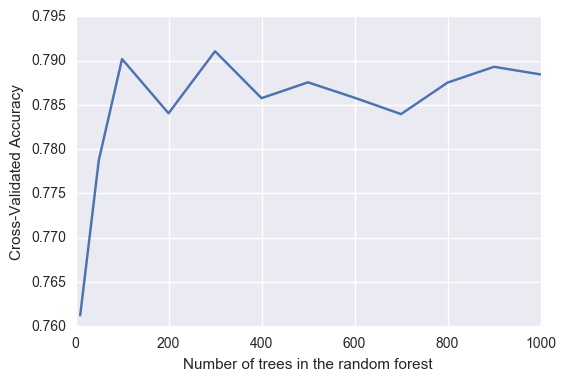

In [46]:
plt.plot(rf_param,rf_scores)
plt.xlabel('Number of trees in the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
idx_worst = np.argmin(rf_scores)

print('best accuracy:')
print(np.max(rf_scores))
print('best parameter:')
best_param = rf_param[idx_best]
worst_param = rf_param[idx_worst]
print(best_param)

### Second hyperparameter : max_depth

Choices for the number of estimators hyperparameter:

In [47]:
max_depth_choices = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]

In [48]:
rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for max_depth_choices_idx, max_depth_choices_value in enumerate(max_depth_choices):
    
    print('max_depth_choices_idx: ',max_depth_choices_idx+1,'/',len(max_depth_choices),', value: ',max_depth_choices_value)

    # Random forest
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=best_param, max_depth=max_depth_choices_value)

    #Scores
    scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
    rf_scores.append(scores.mean())
    rf_param.append(max_depth_choices_value)
    print('Accuracy = ', scores.mean())


max_depth_choices_idx:  1 / 11 , value:  1
Accuracy =  0.760197908565
max_depth_choices_idx:  2 / 11 , value:  2
Accuracy =  0.760182784548
max_depth_choices_idx:  3 / 11 , value:  4
Accuracy =  0.776081907355
max_depth_choices_idx:  4 / 11 , value:  6
Accuracy =  0.785778562786
max_depth_choices_idx:  5 / 11 , value:  8
Accuracy =  0.784885705643
max_depth_choices_idx:  6 / 11 , value:  10
Accuracy =  0.784039300838
max_depth_choices_idx:  7 / 11 , value:  12
Accuracy =  0.784870581626
max_depth_choices_idx:  8 / 11 , value:  14
Accuracy =  0.784885705643
max_depth_choices_idx:  9 / 11 , value:  16
Accuracy =  0.784901909947
max_depth_choices_idx:  10 / 11 , value:  18
Accuracy =  0.781346145536
max_depth_choices_idx:  11 / 11 , value:  20
Accuracy =  0.783116195662


best accuracy:
0.785778562786
best parameter:
6


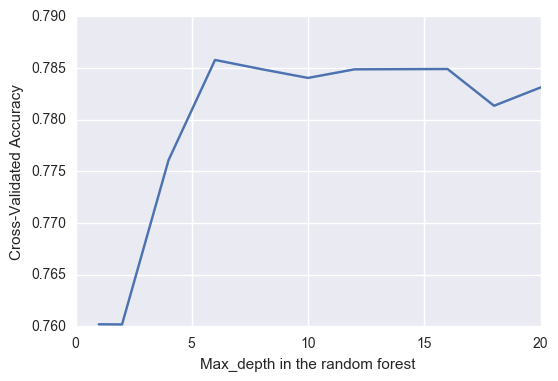

In [49]:
plt.plot(rf_param,rf_scores)
plt.xlabel('Max_depth in the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
idx_worst = np.argmin(rf_scores)

print('best accuracy:')
print(np.max(rf_scores))
print('best parameter:')
best_param_depth = rf_param[idx_best]
worst_param_depth = rf_param[idx_worst]
print(best_param_depth)

## Feature importances

In [50]:
# Random forest
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=best_param,max_depth=best_param_depth)
df_y = np.asarray(df_y, dtype="|S6")
rand_forest_model.fit(df_x,df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
importances = rand_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature meanExp (0.139066)
2. feature defeats (0.111587)
3. feature meanIAT (0.110637)
4. feature victories (0.082473)
5. feature redReferee (0.058886)
6. feature weight (0.048492)
7. feature yellowReferee (0.044297)
8. feature seIAT (0.040281)
9. feature height (0.039673)
10. feature seExp (0.038959)
11. feature ties (0.037195)
12. feature goals (0.031559)
13. feature games (0.028292)
14. feature allCards (0.027224)
15. feature age (0.027055)
16. feature England (0.022446)
17. feature France (0.016975)
18. feature Germany (0.015746)
19. feature Spain (0.014517)
20. feature Attacking Midfielder (0.014428)
21. feature Center Back (0.014101)
22. feature Center Forward (0.008158)
23. feature Center Midfielder (0.005917)
24. feature Defensive Midfielder (0.004060)
25. feature Goalkeeper (0.003689)
26. feature Left Fullback (0.003328)
27. feature Left Midfielder (0.003098)
28. feature Left Winger (0.002262)
29. feature Right Fullback (0.002189)
30. feature Right Midfield

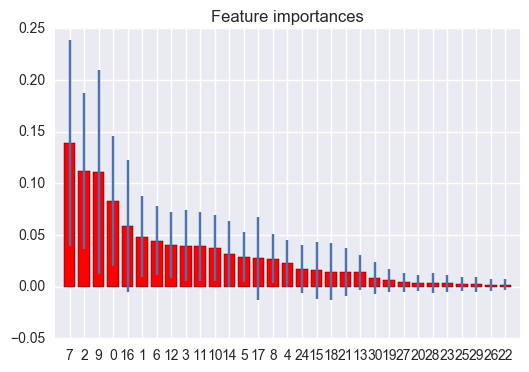

In [52]:
# Get the importance of the features
importances = rand_forest_model.feature_importances_

# Compute the standard deviation
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_], axis=0)

# Get the indices of the most important features, in descending order
indices = np.argsort(importances)[::-1]

variable_importance = []

# Print the feature ranking
print("Feature ranking:")


for feature in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (feature+1, df_x.columns[feature], importances[indices[feature]]))
    variable_importance.append({'Variable': df_x.columns[feature], 'Importance': importances[indices[feature]]})

variable_importance=pd.DataFrame(variable_importance)
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

Let's now remove the features that we assume are the least useful to determine one's skin color.

We will delete the 10 most insignificant features.
By retraining the model and verifying its accuracy, we see it has improved slightly.

In [53]:
s=len(variable_importance)
col_to_remove=variable_importance[s-10:s]['Variable']
df_x.drop(col_to_remove,inplace=True,axis=1,errors='ignore')

In [54]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)

rand_forest_model.fit(df_x_train,df_y_train)
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)
print(accuracy_rand_forest)

0.795774647887


The random forest will be trained again on the whole set, using the same model parameters.

Let's have a look at the features importance now

Feature ranking:
1. feature meanExp (0.160530)
2. feature defeats (0.130154)
3. feature meanIAT (0.098758)
4. feature victories (0.089222)
5. feature redReferee (0.049437)
6. feature weight (0.048562)
7. feature yellowReferee (0.047824)
8. feature seIAT (0.043433)
9. feature height (0.042668)
10. feature seExp (0.041849)
11. feature ties (0.041153)
12. feature goals (0.033355)
13. feature games (0.032868)
14. feature allCards (0.027802)
15. feature age (0.027652)
16. feature England (0.026360)
17. feature France (0.016177)
18. feature Germany (0.015089)
19. feature Spain (0.014050)
20. feature Attacking Midfielder (0.007445)
21. feature Center Back (0.005615)


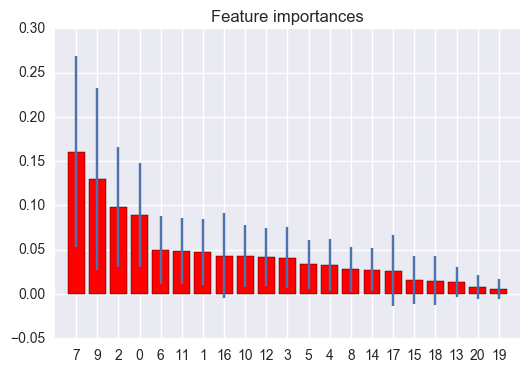

In [55]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df_x.columns[f], importances[indices[f]]))
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

## Bonus question

Firstly the learning curve of the best number of trees and with the max of depth undefined and the 10 most insignificant features deleted.

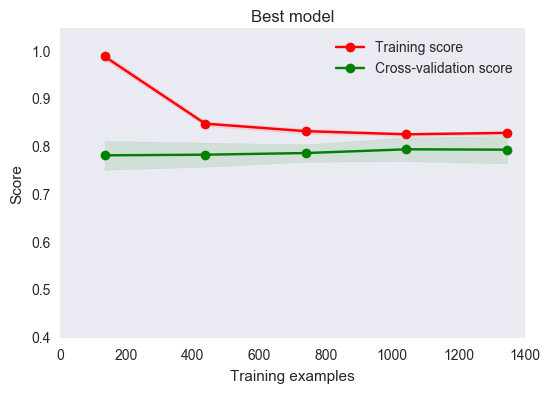

In [56]:
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=best_param,max_depth=best_param_depth)
    plt.figure()
    plt.title("Best model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    axes = plt.gca()
    axes.set_ylim([0.4,1.05])

    plt.legend(loc="best")




As we can see the model has a pretty high accuracy but is overfitting

Now the learning curve of the worst number of trees and a depth of 4 will be plotted

In [57]:
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=1,max_depth=1)


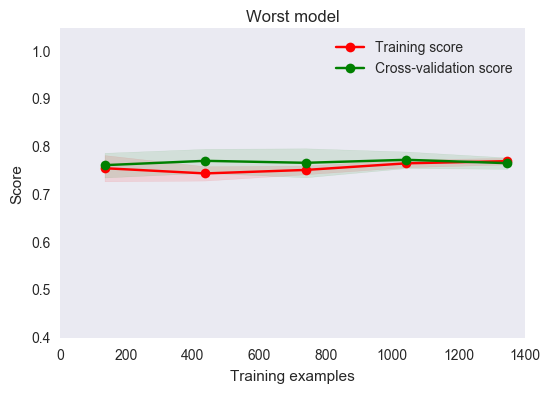

In [58]:
    plt.figure()
    plt.title("Worst model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    axes = plt.gca()
axes.set_ylim([0.4,1.05])

    plt.legend(loc="best")



As it can be seen the worst model was overfitting a lot, having an accuracy of 1 when training and showing a bad performance when testing on a subset of the data it hasn't trained on